In [1]:
%matplotlib inline
import numpy
import pylab

# Gamma encoding process

In [43]:
exponent = 2.2
inv_exponent = 1./exponent
max_raw = 100.
max_enc = 100.
raw = numpy.arange(0., max_raw, 1.)
raw_d = numpy.arange(0., max_enc, max_enc/max_raw )
log_encoded = numpy.log(raw)
gamma_encoded = numpy.power(raw, inv_exponent)
gamma_decoded = numpy.power(raw_d, exponent)
monitor_out = numpy.power(gamma_encoded, exponent)

/home/PhD14/pinedagg/.local/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log


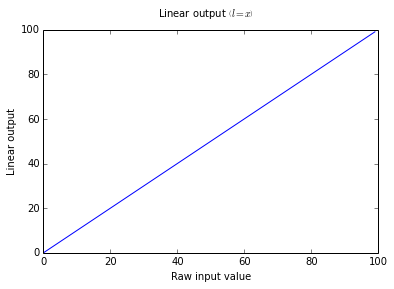

In [44]:
fig = pylab.figure()
fig.suptitle(r"Linear output $\left(l=x\right)$")
pylab.xlabel("Raw input value")
pylab.ylabel("Linear output")
pylab.plot(raw, raw)
pylab.show()

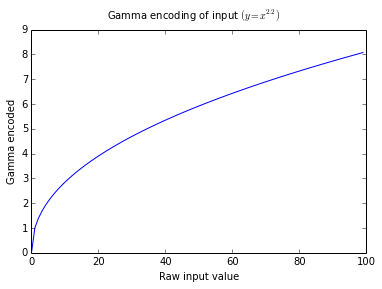

In [45]:
fig = pylab.figure()
fig.suptitle(r"Gamma encoding of input $\left(y=x^{2.2}\right)$")
pylab.xlabel("Raw input value")
pylab.ylabel("Gamma encoded ")
pylab.plot(raw, gamma_encoded)
pylab.show()

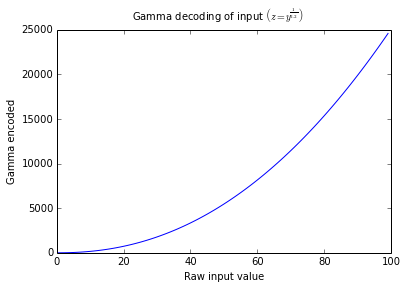

In [46]:
fig = pylab.figure()
fig.suptitle(r"Gamma decoding of input $\left(z=y^{\frac{1}{2.2}}\right)$")
pylab.xlabel("Raw input value")
pylab.ylabel("Gamma encoded ")
pylab.plot(raw_d, gamma_decoded)
pylab.show()

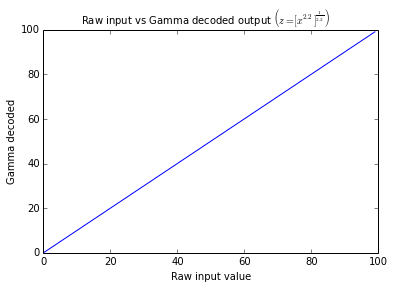

In [47]:
fig = pylab.figure()
fig.suptitle(r"Raw input vs Gamma decoded output $\left(z = [x^{2.2}]^{\frac{1}{2.2}}\right)$")
pylab.xlabel("Raw input value")
pylab.ylabel("Gamma decoded ")
pylab.plot(raw, monitor_out)
pylab.show()

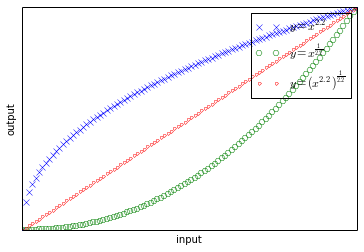

In [48]:
raw_norm = raw/numpy.max(raw)
gamma_norm = gamma_encoded/numpy.max(gamma_encoded)
degamma_norm = gamma_decoded/numpy.max(gamma_decoded)

fig = pylab.figure()
#fig.suptitle(r"Gamma encoding/decoding")
pylab.xlabel("input")
pylab.ylabel("output")
encoded_label, = pylab.plot(raw_norm, gamma_norm, 'x', label='gamma_encoded')
decoded_label, = pylab.plot(raw_norm, degamma_norm, 'H', fillstyle='none',label='gamma_decoded')
monitor_label, = pylab.plot(raw_norm, raw_norm, '.', fillstyle='none', label='monitor_out')
pylab.legend([encoded_label, decoded_label, monitor_label], \
             [r'$y=x^{2.2}$', r'$y=x^{\frac{1}{2.2}}$', r'$y={(x^{2.2})}^{\frac{1}{2.2}}$'])

gca = pylab.gca()
gca.axes.get_xaxis().set_ticks([])
gca.axes.get_yaxis().set_ticks([])
pylab.show()

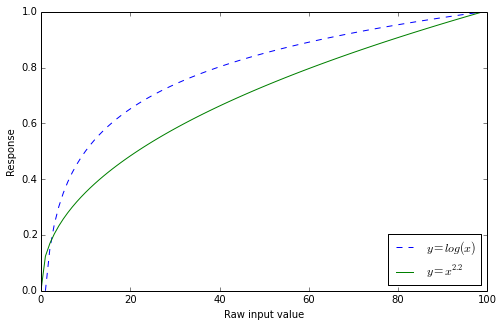

In [49]:
log_norm = log_encoded/numpy.max(log_encoded)
fig = pylab.figure(figsize=(8, 5))
# fig.suptitle(r"Respo")
ax = pylab.subplot(1, 1, 1)
pylab.xlabel("Raw input value")
pylab.ylabel("Response")
log_label, = pylab.plot(raw, log_norm, '--', fillstyle='none', label='Log encoded')
gamma_label, = pylab.plot(raw, gamma_norm, '-', label='Gamma encoded')
fig_label = pylab.legend([log_label, gamma_label], \
                         [r'$y=log(x)$', r'$y=x^{2.2}$'], \
                         loc='lower right')#, shadow=True)
frame = fig_label.get_frame()
frame.set_facecolor('1.0')
pylab.savefig("log_vs_gamma_response.png", dpi=1200)
pylab.show()